In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\SOMESH GOWDA\OneDrive\Desktop\AITCHNU\archive\WineQT.csv')

In [4]:
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [5]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
filtered_alcohol = df[df['alcohol'] > 10]
print(filtered_alcohol)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
12              8.5             0.280         0.56             1.8      0.092   
22              6.7             0.675         0.07             2.4      0.089   
26              7.8             0.600         0.14             2.4      0.086   
28              7.3             0.450         0.36             5.9      0.074   
30              7.5             0.490         0.20             2.6      0.332   
...             ...               ...          ...             ...        ...   
1137            5.4             0.740         0.09             1.7      0.089   
1138            6.3             0.510         0.13             2.3      0.076   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [9]:
sorted_by_quality = df.sort_values(by='quality', ascending=True)
sorted_by_alcohol = df.sort_values(by='alcohol', ascending=False)
print(sorted_by_quality)
print(sorted_by_alcohol)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
922             7.6             1.580         0.00             2.1      0.137   
324            11.6             0.580         0.66             2.2      0.074   
1055            7.1             0.875         0.05             5.7      0.082   
368            10.4             0.610         0.49             2.1      0.200   
1046            7.3             0.980         0.05             2.1      0.061   
...             ...               ...          ...             ...        ...   
793             7.9             0.540         0.34             2.5      0.076   
340             9.4             0.300         0.56             2.8      0.080   
321            11.3             0.620         0.67             5.2      0.086   
1030            7.2             0.380         0.31             2.0      0.056   
1104            7.4             0.360         0.30             1.8      0.074   

      free sulfur dioxide  

In [10]:
grouped_mean = df.groupby('quality').mean()
median_alcohol = df.groupby('quality')['alcohol'].median()
print(grouped_mean)
print(median_alcohol)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368 

In [12]:
df['quality_label'] = ['High Quality' if x > 7 else 'Low Quality' for x in df['quality']]
print(df['quality_label'])

0       Low Quality
1       Low Quality
2       Low Quality
3       Low Quality
4       Low Quality
           ...     
1138    Low Quality
1139    Low Quality
1140    Low Quality
1141    Low Quality
1142    Low Quality
Name: quality_label, Length: 1143, dtype: object


In [13]:
import numpy as np

In [15]:
# Basic statistics for alcohol
mean_alcohol = np.mean(df['alcohol'])
median_alcohol = np.median(df['alcohol'])
std_alcohol = np.std(df['alcohol'])
min_alcohol = np.min(df['alcohol'])
max_alcohol = np.max(df['alcohol'])

print(mean_alcohol, median_alcohol, std_alcohol, min_alcohol, max_alcohol)

10.442111402741325 10.2 1.0817221048833665 8.4 14.9


In [18]:
# Correlation between alcohol and quality
correlation = np.corrcoef(df['alcohol'], df['quality'])
print(correlation)

[[1.         0.48486621]
 [0.48486621 1.        ]]


In [19]:
# Convert columns to NumPy arrays and perform operations
alcohol_array = np.array(df['alcohol'])
normalized_alcohol = (alcohol_array - alcohol_array.min()) / (alcohol_array.max() - alcohol_array.min())
unique_quality = np.unique(df['quality'])

print(alcohol_array)
print(normalized_alcohol)
print(unique_quality)

[ 9.4  9.8  9.8 ... 10.5 11.2 10.2]
[0.15384615 0.21538462 0.21538462 ... 0.32307692 0.43076923 0.27692308]
[3 4 5 6 7 8]


In [20]:
# Statistical comparison between high and low quality wines
from scipy.stats import ttest_ind
high_quality_wines = df[df['quality'] > 7]['alcohol']
low_quality_wines = df[df['quality'] <= 7]['alcohol']
t_stat, p_val = ttest_ind(high_quality_wines, low_quality_wines)

print(t_stat, p_val)

5.640948445121346 2.1314543377684155e-08


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


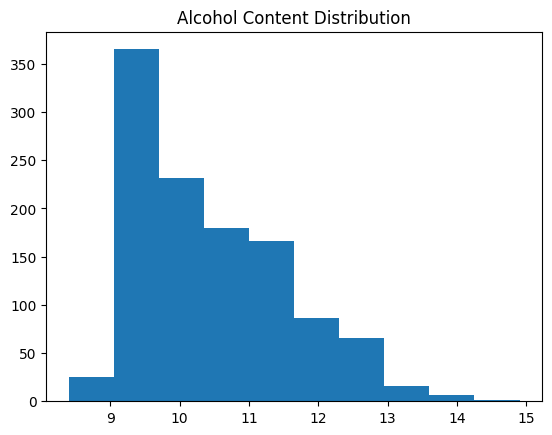

In [22]:
# Histogram for alcohol
plt.hist(df['alcohol'], bins=10)
plt.title('Alcohol Content Distribution')
plt.show()

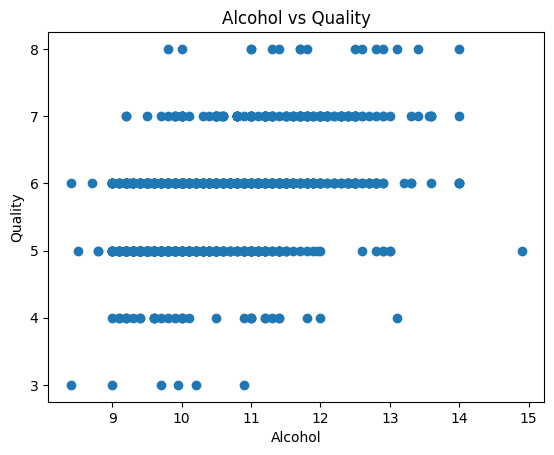

In [23]:

# Scatter plot for alcohol vs quality
plt.scatter(df['alcohol'], df['quality'])
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

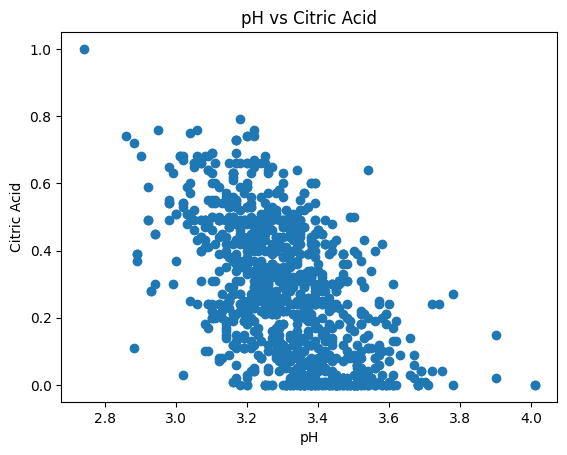

In [31]:

# Scatter plot for pH vs citric acid
plt.scatter(df['pH'], df['citric acid'])
plt.title('pH vs Citric Acid')
plt.xlabel('pH')
plt.ylabel('Citric Acid')
plt.show()

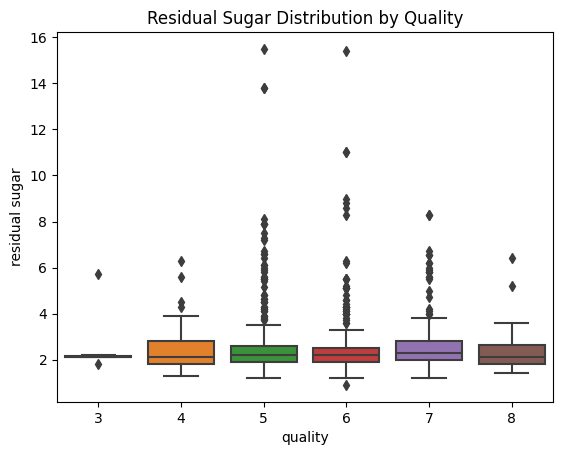

In [32]:

# Box plot for residual sugar across quality levels
sns.boxplot(x='quality', y='residual sugar', data=df)
plt.title('Residual Sugar Distribution by Quality')
plt.show()

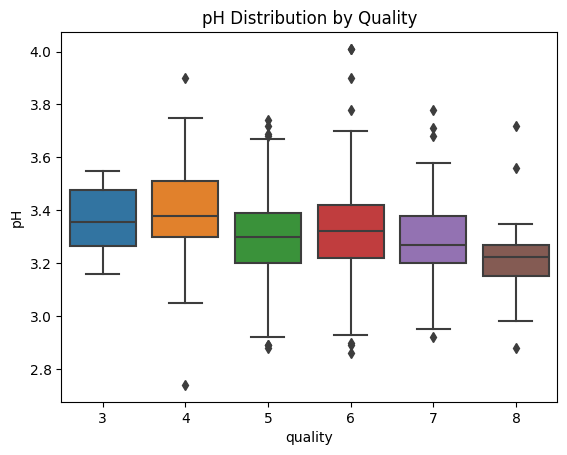

In [28]:

# Box plot for pH across different quality ratings
sns.boxplot(x='quality', y='pH', data=df)
plt.title('pH Distribution by Quality')
plt.show()

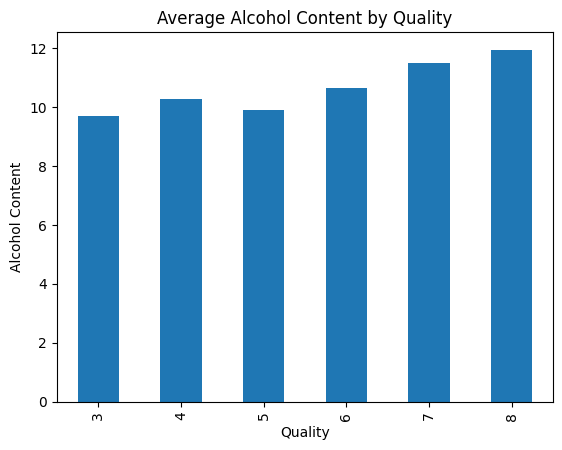

In [29]:

# Bar plot for average alcohol content by quality
df.groupby('quality')['alcohol'].mean().plot(kind='bar')
plt.title('Average Alcohol Content by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

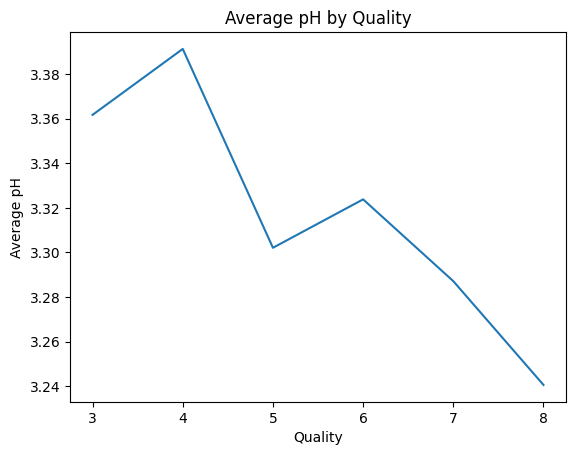

In [30]:

# Line plot for average pH as a function of wine quality
avg_pH = df.groupby('quality')['pH'].mean()
plt.plot(avg_pH.index, avg_pH.values)
plt.title('Average pH by Quality')
plt.xlabel('Quality')
plt.ylabel('Average pH')
plt.show()